In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_raw = pd.read_csv('Fraud_check.csv')
data_raw

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data_raw.describe(include = 'all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [8]:
data = data_raw.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income' : 'taxable_income', 
                               'City.Population' : 'population', 'Work.Experience' : 'work_exp'})
n = 0
for i in data['taxable_income']:
    if i <= 30000:
        data['taxable_income'][n] = 'Risky'
    else:
        data['taxable_income'][n] = 'Good'
    n += 1

C:\Users\WAY TOMORROW\AppData\Local\Temp/ipykernel_39040/3545867949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['taxable_income'][n] = 'Good'
C:\Users\WAY TOMORROW\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
data

,Undergrad,marital_status,taxable_income,population,work_exp,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [9]:
data['Undergrad'] = data['Undergrad'].map({'NO' : 0, 'YES' : 1})
data['marital_status'] = data['marital_status'].map({'Single' : 0, 'Married' : 1, 'Divorced' : 2})
data['Urban'] = data['Urban'].map({'NO' : 0, 'YES' : 1})
data

,Undergrad,marital_status,taxable_income,population,work_exp,Urban
0,0,0,Good,50047,10,1
1,1,2,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,0,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,2,Good,39492,7,1
596,1,2,Good,55369,2,1
597,0,2,Good,154058,0,1
598,1,1,Good,180083,17,0


In [10]:
y = data['taxable_income']
X = data.drop('taxable_income', axis = 1)

# Decision Tree CART method

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X , y)
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
predictions = tree.predict(X_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
pred_df

,Actual,Predicted
41,Good,Risky
487,Good,Good
208,Good,Risky
153,Risky,Good
365,Good,Good
...,...,...
29,Good,Good
585,Good,Risky
21,Risky,Risky
61,Risky,Risky


In [13]:
np.mean(y_test == predictions)

0.5933333333333334

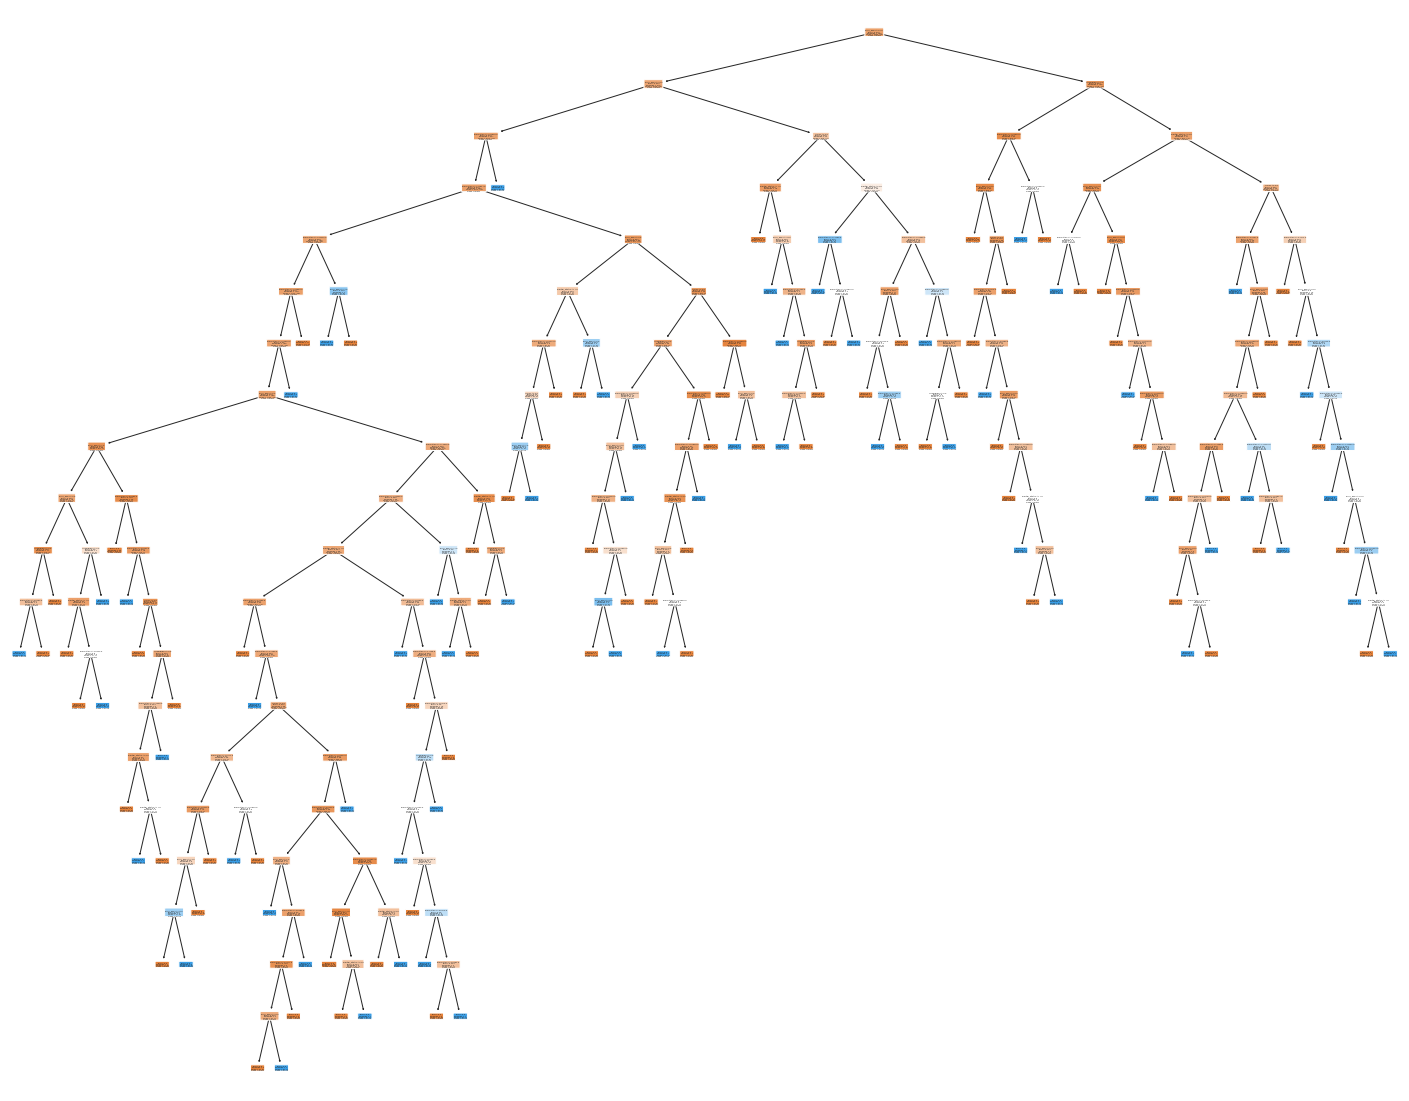

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize = (25,20))
plot_tree(tree, filled = True, rounded = True, class_names = ['Risky', 'Good'], feature_names = X.columns)
plt.show()

# Pruning using cost complexity pruning

In [15]:
pruning = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = pruning.ccp_alphas[:-1]
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha, criterion ='gini')
    tree.fit(X_train, y_train)
    trees.append(tree)
ccp_alphas

array([0.        , 0.00131687, 0.00138889, 0.00156863, 0.00164609,
       0.00166667, 0.00177778, 0.00177778, 0.00185185, 0.00185185,
       0.00185859, 0.00186179, 0.00197531, 0.0020202 , 0.00203704,
       0.00203704, 0.0020651 , 0.00213333, 0.00216216, 0.00217978,
       0.00219625, 0.00222222, 0.00222222, 0.0022451 , 0.00225537,
       0.00231481, 0.00231628, 0.00232323, 0.00246914, 0.00247568,
       0.00273504, 0.002743  , 0.00277778, 0.00282828, 0.0031746 ,
       0.00327024, 0.00333333, 0.00358586, 0.00381481, 0.00419192])

In [16]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

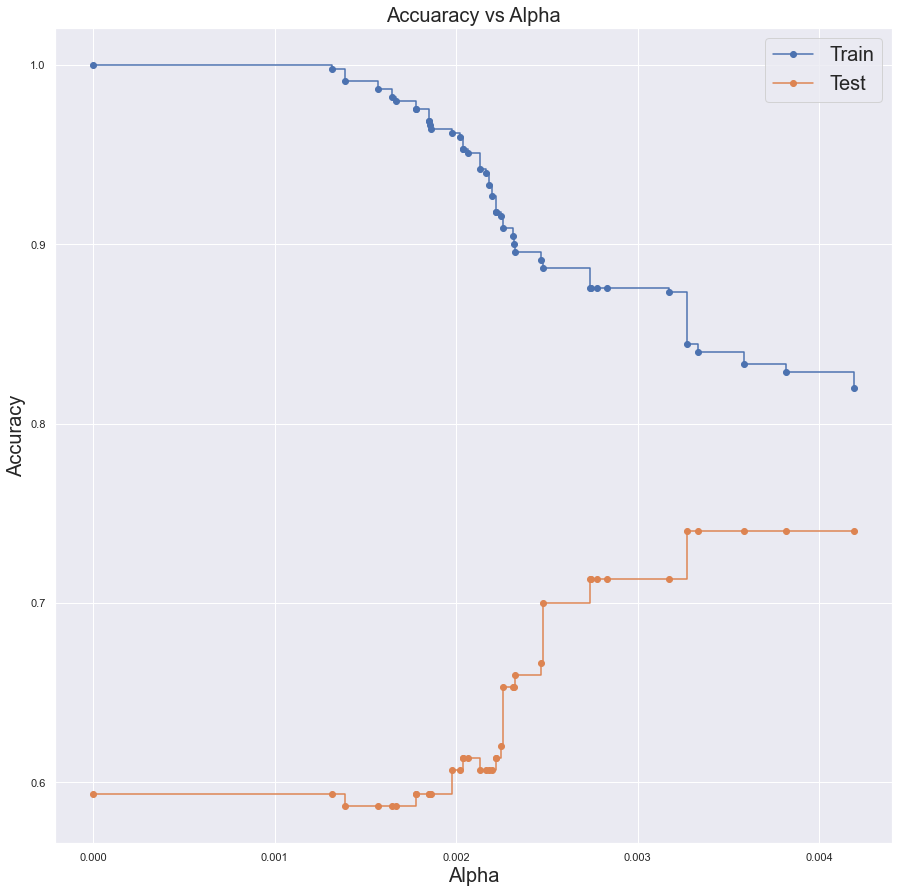

In [17]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel('Alpha', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Accuaracy vs Alpha', fontsize = 20)
ax.plot(ccp_alphas, train_scores, drawstyle = 'steps-post', marker = 'o', label = 'Train' )
ax.plot(ccp_alphas, test_scores, drawstyle = 'steps-post', marker = 'o', label = 'Test')
ax.legend(fontsize = 20)
plt.show()

# K-fold to determine best value of alpha

In [18]:
kfold = KFold(10)
alpha_values = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha, criterion = 'gini')
    scores = cross_val_score(tree, X_train, y_train, cv = kfold)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.646667,0.054840
1,0.001317,0.648889,0.052399
2,0.001389,0.648889,0.052399
3,0.001569,0.646667,0.053008
4,0.001646,0.651111,0.055377
5,0.001667,0.651111,0.055377
6,0.001778,0.651111,0.055377
7,0.001778,0.651111,0.055377
8,0.001852,0.651111,0.055377
9,0.001852,0.651111,0.055377


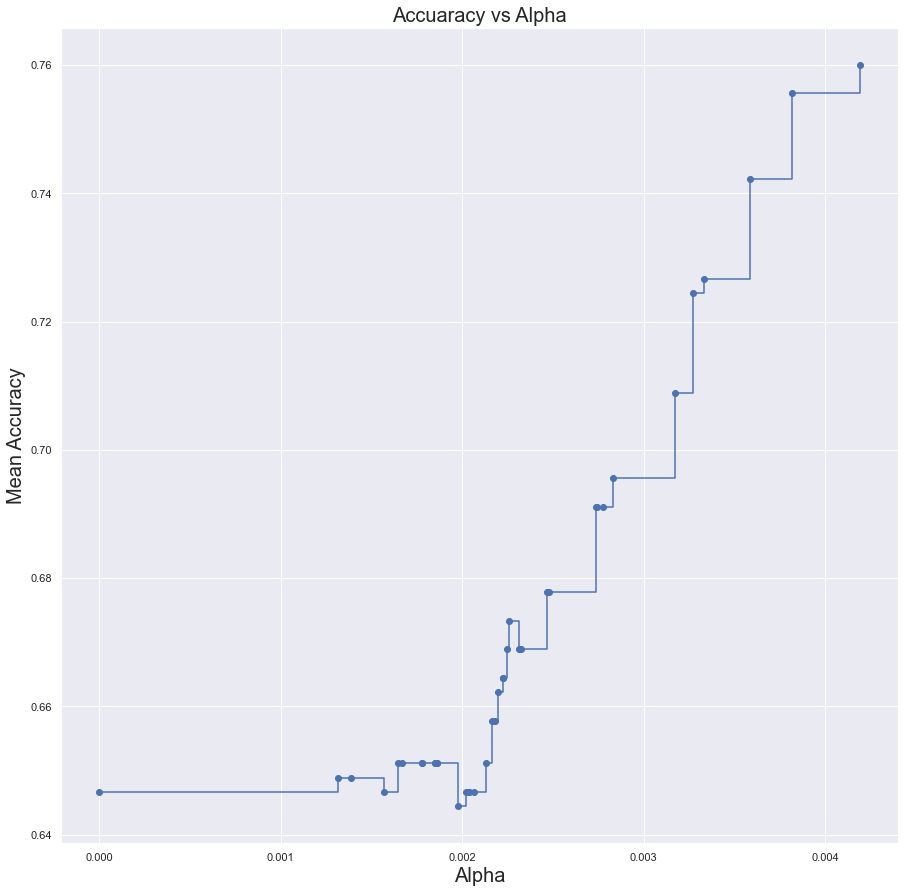

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel('Alpha', fontsize = 20)
ax.set_ylabel('Mean Accuracy', fontsize = 20)
ax.set_title('Accuaracy vs Alpha', fontsize = 20)
ax.plot(ccp_alphas, alpha_results['mean_accuracy'], drawstyle = 'steps-post', marker = 'o')
plt.show()

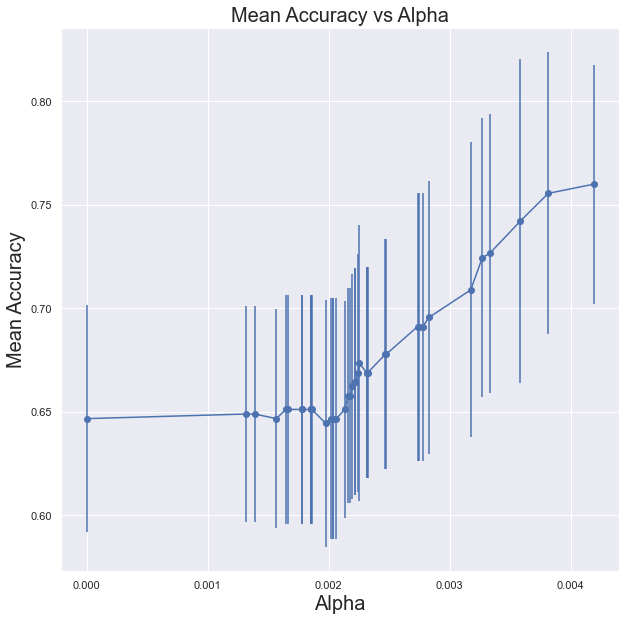

In [20]:
plt.figure(figsize = (10,10))
plt.errorbar(x = alpha_results['alpha'], y = alpha_results['mean_accuracy'], yerr = alpha_results['std'], marker = 'o')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Mean Accuracy vs Alpha', fontsize = 20)
plt.show()

In [21]:
alpha_ideal =  float(ccp_alphas[-1:])
alpha_ideal

0.004191919191919191

# Pruned Decision Tree

In [22]:
tree_pruned = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha = alpha_ideal)
tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004191919191919191, random_state=42)

In [23]:
predictions = tree_pruned.predict(X_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predictions'] = predictions
pred_df

,Actual,Predictions
41,Good,Good
487,Good,Good
208,Good,Good
153,Risky,Good
365,Good,Good
...,...,...
29,Good,Good
585,Good,Risky
21,Risky,Good
61,Risky,Good


In [24]:
np.mean(predictions == y_test)

0.74

In [25]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[111,   3],
       [ 36,   0]], dtype=int64)

C:\Users\WAY TOMORROW\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


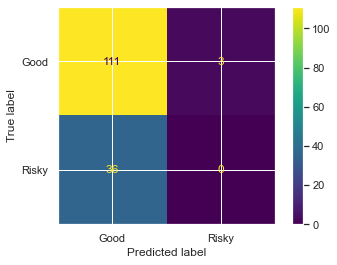

In [26]:
plot_confusion_matrix(tree_pruned, X_test, y_test)

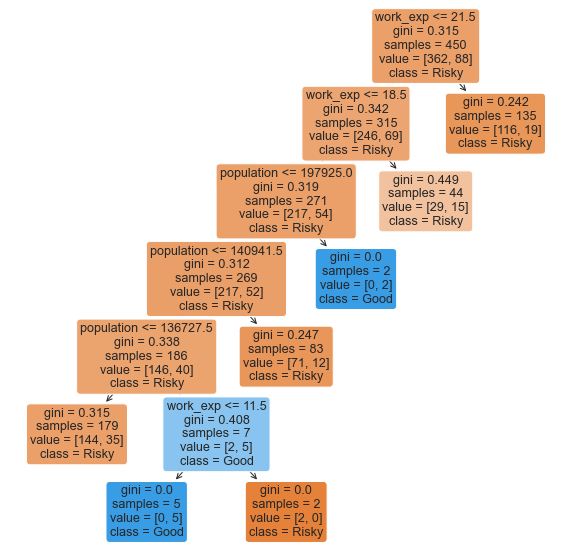

In [27]:
plt.figure(figsize = (10,10))
plot_tree(tree_pruned, filled = True, rounded = True, class_names = ['Risky', 'Good'], feature_names = X.columns)
plt.show()